#🧪 Practical: K-Means Clustering from Scratch

🎯 Objective:

To implement and evaluate K-Means Clustering using synthetic data, visualize clusters, and apply the Elbow Method to find the optimal number of clusters.

#✅ Step 1: Import Required Libraries

In [74]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn tools
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


#✅ Step 2: Generate Synthetic Dataset for Clustering

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


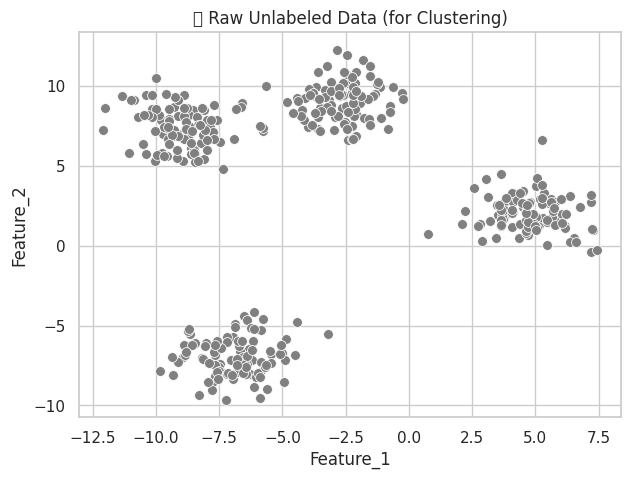

In [75]:
# Set seed for reproducibility
np.random.seed(42)

# Generate 2D data with 4 distinct clusters using make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=1.2, random_state=42)

# Convert to DataFrame for easier plotting and inspection
df = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])

# Visualize raw data points
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="Feature_1", y="Feature_2", s=50, color="gray")
plt.title("🎯 Raw Unlabeled Data (for Clustering)")
plt.grid(True)
plt.show()


#✅ Step 3: Determine Optimal Clusters Using Elbow Method

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


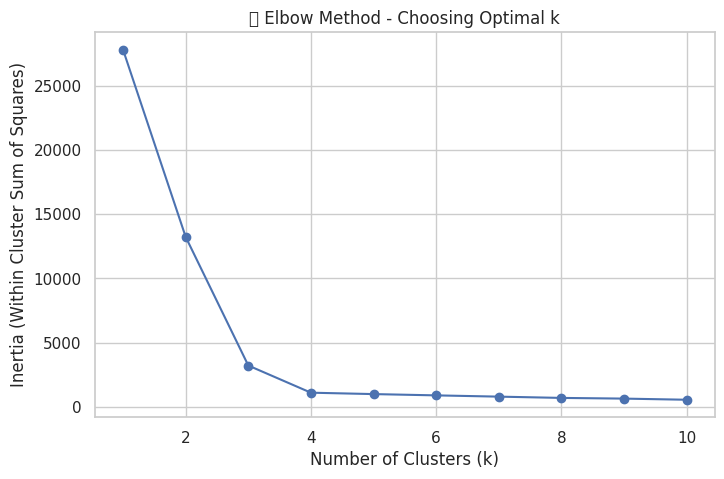

In [76]:
# Test different k values and calculate inertia (sum of squared distances to cluster centers)
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, marker='o')
plt.title("📉 Elbow Method - Choosing Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within Cluster Sum of Squares)")
plt.grid(True)
plt.show()


🔍 Note: Look for the "elbow" point — the curve flattens after the optimal number of clusters (visually it will look like an elbow).

#✅ Step 4: Apply KMeans with Optimal k (let’s use k=4)

In [77]:
# Fit model with optimal number of clusters
kmeans_model = KMeans(n_clusters=4, n_init=10, random_state=42)
cluster_labels = kmeans_model.fit_predict(X)

# Add cluster labels to DataFrame
df["Cluster"] = cluster_labels


#✅ Step 5: Visualize Clustered Data

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


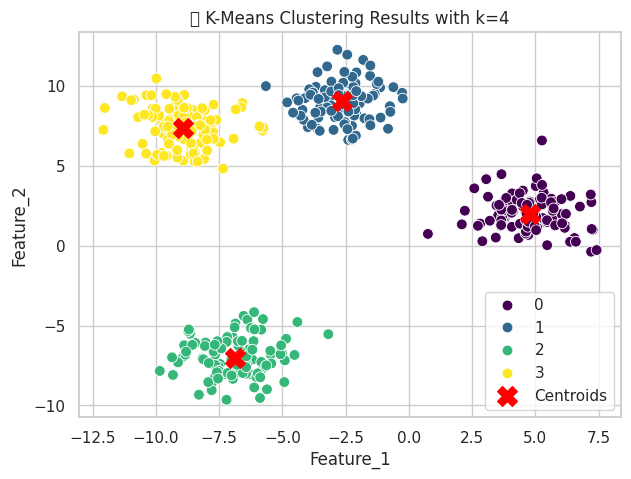

In [78]:
# Visualize clusters with centroids
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="Feature_1", y="Feature_2", hue="Cluster", palette="viridis", s=60)
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("📊 K-Means Clustering Results with k=4")
plt.legend()
plt.grid(True)
plt.show()


#✅ Step 6: Evaluate Clustering with Silhouette Score

In [79]:
# Calculate Silhouette Score (range: -1 to 1), higher is better
score = silhouette_score(X, cluster_labels)
print(f"✅ Silhouette Score for k=4: {score:.4f}")



✅ Silhouette Score for k=4: 0.7519


#✅ Step 7: Summary and Interpretation

In [80]:
print("\n📌 Summary:")
print(f"✔️ Optimal k (from elbow method): 4")
print(f"✔️ Silhouette Score indicates how well-separated clusters are: {score:.4f}")
print("✔️ Red 'X' markers represent cluster centroids.")
print("✔️ You can try different 'k' values and observe how clusters change.")



📌 Summary:
✔️ Optimal k (from elbow method): 4
✔️ Silhouette Score indicates how well-separated clusters are: 0.7519
✔️ Red 'X' markers represent cluster centroids.
✔️ You can try different 'k' values and observe how clusters change.


#📘 Educational Notes for Students

| Concept            | Purpose                                          |
| ------------------ | ------------------------------------------------ |
| `make_blobs()`     | To generate synthetic data with known clusters   |
| `inertia_`         | Measures how tightly grouped the clusters are    |
| `silhouette_score` | Evaluates cluster separation and cohesion        |
| `cluster_centers_` | Coordinates of final centroids after convergence |
